In [2]:
import plotly.express as px
import pandas as pd
import gzip
import json
from google.colab import files
import missingno as msno
import re

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


The path of the two parts of the dataset, the first one contains the metadata of products while the second contains review-related information

In [4]:
file_path1 = "/content/drive/MyDrive/RECsys/meta_Software.json.gz"

In [5]:
file_path2 = "/content/drive/MyDrive/RECsys/Software.json.gz"

The following code cell is for defining the readJson function, its purpose is well defined in the associated comment.

In [6]:
def readJSON(file_path, inChunks, percentage):
    """
    The readJSON function decompresses a .gz file containing list of Json
    onjects and reads in chunks when the inChunks parameter is set to True.

    :file_path: The path of the file to be read.
    :inChunks:  If True, reads the file in chunks based on the percentage
    parameter.
                If False, reads the entire file.
    :percentage: The total percentage to read from the file if inChunks is True.
    :return: returns a list of Json objects.
    """

    json_objects = []

    if (inChunks is False):
        precentage = 1

    with gzip.open(file_path, 'rt') as f:
        total_lines = sum(1 for line in f)
        fraction = round(total_lines * percentage)

    with gzip.open(file_path, 'rt') as f:
        for i, line in enumerate(f):
            if i > fraction:
              break
            try:
              json_data = json.loads(line)
              json_objects.append(json_data)
            except json.JSONDecodeError:
              print(f"Error parsing line: {line}")

    return json_objects

In [7]:
json_objects1 = readJSON(file_path1, False, 1)

In [8]:
json_objects2 = readJSON(file_path2, False, 1)

Converting the two lists of Json objects into dataframes, then deleting the lists in case of reading huge files for memory safety.

In [9]:
df1 = pd.DataFrame.from_records(json_objects1)

In [10]:
del json_objects1

In [11]:
df2 = pd.DataFrame.from_records(json_objects2)

In [12]:
del json_objects2

Getting a feel of the dataframes by analyzing the number of rows and columns

In [13]:
df1.shape

(26790, 19)

In [14]:
df2.shape

(459436, 12)

In [15]:
df2

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image
0,4.0,True,"03 11, 2014",A240ORQ2LF9LUI,0077613252,{'Format:': ' Loose Leaf'},Michelle W,The materials arrived early and were in excell...,Material Great,1394496000,NaN,NaN
1,4.0,True,"02 23, 2014",A1YCCU0YRLS0FE,0077613252,{'Format:': ' Loose Leaf'},Rosalind White Ames,I am really enjoying this book with the worksh...,Health,1393113600,NaN,NaN
2,1.0,True,"02 17, 2014",A1BJHRQDYVAY2J,0077613252,{'Format:': ' Loose Leaf'},Allan R. Baker,"IF YOU ARE TAKING THIS CLASS DON""T WASTE YOUR ...",ARE YOU KIDING ME?,1392595200,7,NaN
3,3.0,True,"02 17, 2014",APRDVZ6QBIQXT,0077613252,{'Format:': ' Loose Leaf'},Lucy,This book was missing pages!!! Important pages...,missing pages!!,1392595200,3,NaN
4,5.0,False,"10 14, 2013",A2JZTTBSLS1QXV,0077775473,NaN,Albert V.,I have used LearnSmart and can officially say ...,Best study product out there!,1381708800,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
459431,2.0,True,"11 29, 2016",AGEWYJ2NF5C2H,B01HF41TKI,NaN,Bonita Alferes,No instructions.....No Help unless you want to...,Two Stars,1480377600,NaN,NaN
459432,1.0,True,"03 1, 2018",A3VCFV8WEQG9R5,B01HF3G4BS,NaN,mekonen,it's a joke,One Star,1519862400,NaN,NaN
459433,5.0,True,"12 2, 2017",A3DXGHJF6SOHNC,B01HF3G4BS,NaN,bbeckham,I have multiple licenses of the Antivirus. I h...,This is very effective antivirus software.,1512172800,NaN,NaN
459434,5.0,True,"09 15, 2018",A1WOS4D7QA06DO,B01HJAMWOK,NaN,Charles E. Potter,good value,Five Stars,1536969600,NaN,NaN


Checking for missing values in both dataframes

In [16]:
df1.isna().sum()

category             0
tech1                0
description          0
fit                  0
title                0
also_buy             0
tech2                0
brand                0
feature              0
rank                 0
also_view            0
main_cat             0
similar_item         0
date                 0
price                0
asin                 0
imageURL             0
imageURLHighRes      0
details            852
dtype: int64

<Axes: >

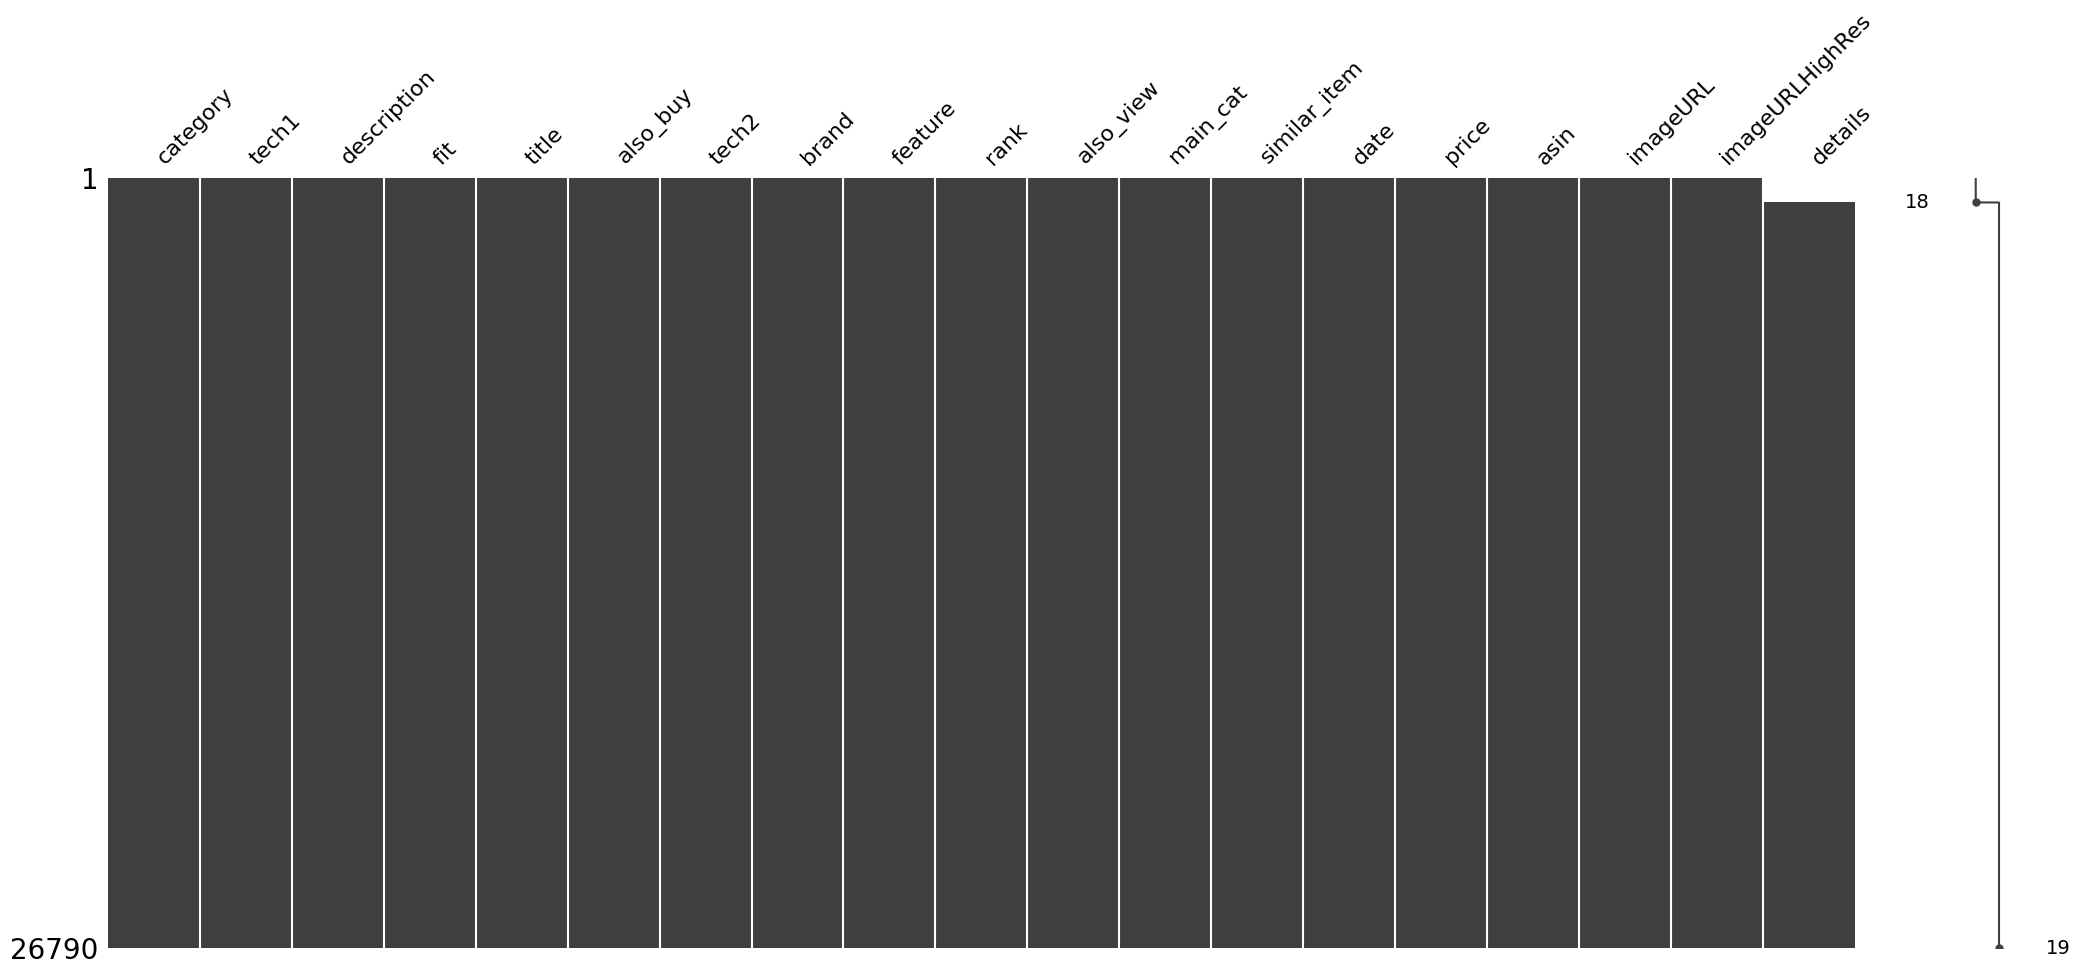

In [17]:
msno.matrix(df1)

In [18]:
df2.isna().sum()

overall                0
verified               0
reviewTime             0
reviewerID             0
asin                   0
style             225035
reviewerName          24
reviewText            66
summary               56
unixReviewTime         0
vote              331583
image             457928
dtype: int64

<Axes: >

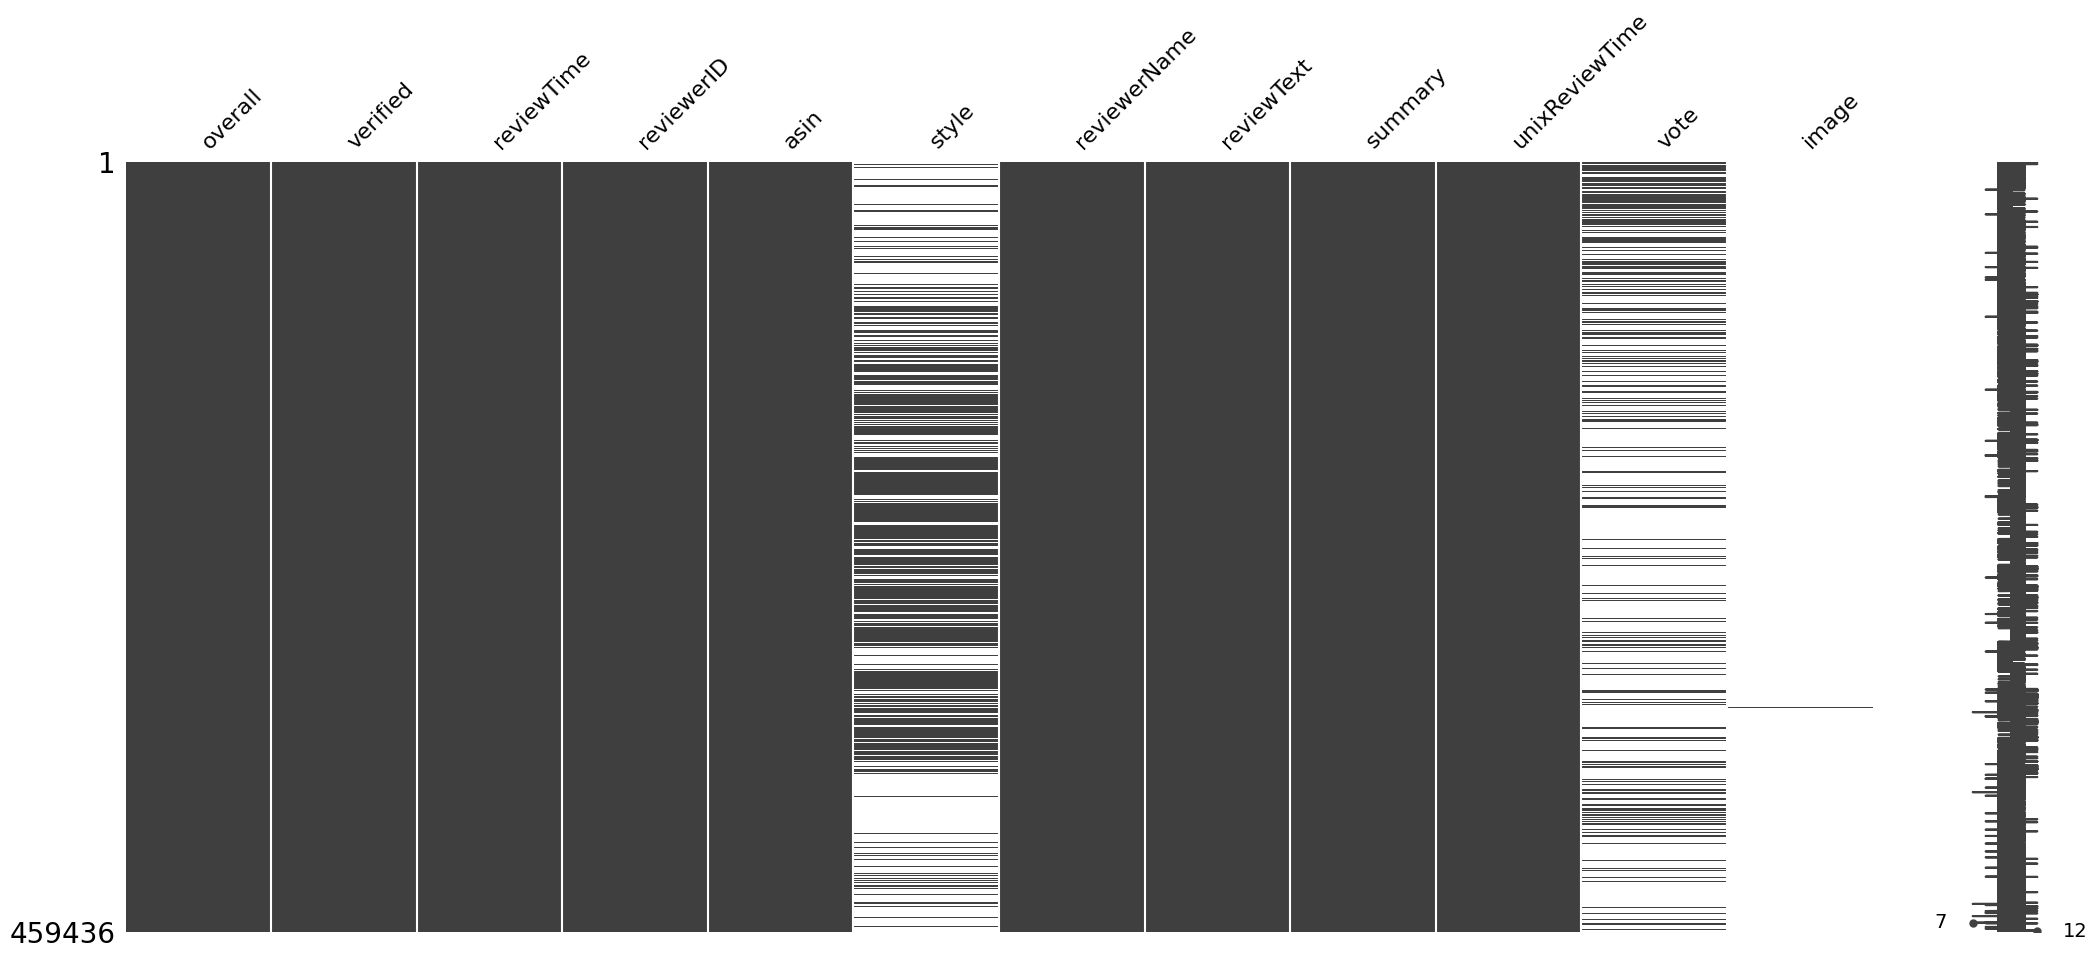

In [19]:
msno.matrix(df2)

In [20]:
df1.columns

Index(['category', 'tech1', 'description', 'fit', 'title', 'also_buy', 'tech2',
       'brand', 'feature', 'rank', 'also_view', 'main_cat', 'similar_item',
       'date', 'price', 'asin', 'imageURL', 'imageURLHighRes', 'details'],
      dtype='object')

Counting how many lines have no empty lists in the also_view column

In [21]:
count_non_empty_lists0 = df1['also_view'].apply(lambda x: len(x) > 0).sum()

In [22]:
count_non_empty_lists0

6978

Counting how many lines have no empty lists in the als_buy column

In [23]:
count_non_empty_lists = df1['also_buy'].apply(lambda x: len(x) > 0).sum()

In [24]:
count_non_empty_lists

2654

Not many cells within this column have values, so  it will be dropped



In [25]:
df1[df1['similar_item'] != '']['similar_item'].count()

46

count of lines in the rank column that have software in them, it seems like quite a lot do have it so it is good

In [26]:
count = df1['rank'].str.contains(r'Software').sum()

In [27]:
count

21316

The category column is more like the subcategories of each category

In [28]:
df1.iloc[9000]['category']

['Software', 'Accounting & Finance', 'Business Accounting']

In [29]:
df1.rename(columns= {'category' : 'sub_categories'})

,sub_categories,tech1,description,fit,title,also_buy,tech2,brand,feature,rank,also_view,main_cat,similar_item,date,price,asin,imageURL,imageURLHighRes,details
0,[],,[],,HOLT PHYSICS LESSON PRESENTATION CD-ROM QUICK ...,[],,HOLT. RINEHART AND WINSTON,[],"25,550 in Software (",[],Software,,</div>,.a-box-inner{background-color:#fff}#alohaBuyBo...,0030672120,[],[],NaN
1,[],,"[, <b>Latin rhythms that will get your kids si...",,"Sing, Watch, &amp; Learn Spanish (DVD + Guide)...",[],,McGraw Hill,[],"15,792 in Software (",[],Software,,</div>,,0071480935,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,NaN
2,[],,[<b>Connect is the only integrated learning sy...,,Connect with LearnSmart Access Card for Microb...,[],,McGraw-Hill Science/Engineering/Math,[],"16,900 in Software (",[],Software,,</div>,,007329506X,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,NaN
3,[],,[],,LearnSmart Standalone Access Card for Prescott...,[],,McGraw-Hill Education,[],"12,986 in Software (",[],Software,,</div>,,0073513458,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,NaN
4,[],,[<i>Anatomy &amp; Physiology Revealed Cat</i> ...,,Anatomy &amp; Physiology Revealed Student Acce...,"[0323394612, 0323227937, 1118527488]",,McGraw-Hill Education,[],"14,861 in Software (",[],Software,,</div>,$4.83,0073525758,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26785,"[Software, Children's]",,[<b>Features: </b><br>1. Beautiful and fabulou...,,925 Sterling Silver Angel Wings Heart Pendant ...,"[B07B4B12JX, B008UX1WJ2]",,17maimeng,[Material: Guaranteed 100% Real Silver+Platinu...,"1,389,844 in Clothing, Shoes & Jewelry (","[B008UX1WJ2, B0094JVCKU, B077J3DR69, B07J4Z659...","<img src=""https://images-na.ssl-images-amazon....",,17maimeng,$24.00,B01HEFZJC2,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,{}
26786,"[Software, Children's, Material: Guaranteed 10...",,[<b>Features: </b><br>1. Beautiful and fabulou...,,925 Sterling Silver Love Heart Opal Pendant Ne...,[],,17maimeng,[Material: Guaranteed 100% Real Silver+Platinu...,"1,469,307 in Clothing, Shoes & Jewelry (","[B074M486S8, B01D4H965K, B077L7GGF4, B019D8X0W...","<img src=""https://images-na.ssl-images-amazon....",,17maimeng,$23.20,B01HEFZKEE,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,{}
26787,"[Software, Digital Software, Antivirus & Secur...",,[<div>Mac Internet Security X9 contains two of...,,Intego Mac Internet Security X9 - 1 Mac - 1 ye...,[],,Intego,[Award-winning antivirus software to protect a...,"2,733 in Software (","[B01MF5MTWP, B015724B8M, B07CYFFH4H, B07CY54KL...",Software,,</div>,$39.99,B01HF3G4BS,[],[],"{'Downloading:': 'Currently, this item is avai..."
26788,[],,[VersaCheck X9 for QuickBooks 2016 DNA Secure ...,,VersaCheck X9 Small and Medium Business 2016 3...,[],,Diversified Productivity Solutions Ltd,[],"15,575 in Software (",[],Software,,</div>,$24.39,B01HF41TKI,[],[],"{'Shipping Weight:': '1.3 pounds', 'ASIN:': 'B..."


We observe that the date's column contains mostly an html component or empty string but not the actual date, so it will not be usefull in the analysis of trends.

In [30]:
count_non_empty_lines = df1['date'].str.contains(r'.|</div>').sum()
count_non_empty_lines

23878

The main category a product belongs to

In [31]:
df1['main_cat'].unique()

array(['Software', 'Books', 'Movies &amp; TV', 'Video Games',
       'Movies & TV', 'Office Products', 'Health &amp; Personal Care',
       'Amazon Home', 'Industrial & Scientific', 'Toys &amp; Games',
       'Musical Instruments', 'Tools &amp; Home Improvement',
       'Cell Phones & Accessories', 'Cell Phones &amp; Accessories',
       'All Electronics', 'Home Audio & Theater', 'Camera &amp; Photo',
       'Baby', 'Toys & Games',
       '<img src="https://images-na.ssl-images-amazon.com/images/G/01/digital/music/logos/amzn_music_logo_subnav._CB471835632_.png" class="nav-categ-image" alt="Digital Music"/>',
       'Pet Supplies', 'GPS & Navigation', 'Computers',
       'Home Audio &amp; Theater', 'GPS &amp; Navigation', 'Automotive',
       'Health & Personal Care', 'Sports &amp; Outdoors',
       'Arts, Crafts & Sewing', 'Arts, Crafts &amp; Sewing',
       'Camera & Photo', 'Tools & Home Improvement',
       '<img src="https://images-na.ssl-images-amazon.com/images/G/01/digital/music

Dropping all the non useful columns

In [32]:
df1.drop(columns=['tech1', 'tech2', 'imageURL', 'date', 'details', 'fit', 'similar_item'], inplace=True)

In [33]:
df1.columns

Index(['category', 'description', 'title', 'also_buy', 'brand', 'feature',
       'rank', 'also_view', 'main_cat', 'price', 'asin', 'imageURLHighRes'],
      dtype='object')

Creating the first visualisation dataframe

In [34]:
vizDF1 = df1[['category', 'title', 'also_buy', 'brand', 'feature', 'rank', 'also_view', 'main_cat', 'price', 'asin']].copy()

We define a column that extracts the highest rank of a products in a category where it was ranked in.

Sometimes the rank column has a list containing different ranks based on categories

In [35]:
list_of_lists = [x for x in vizDF1['rank'] if isinstance(x, list)]

In [36]:
list_of_lists

[['>#47,618 in Video Games (See Top 100 in Video Games)',
  '>#46 in Software > Education & Reference > Typing'],
 ['>#41,699 in Video Games (See Top 100 in Video Games)',
  ">#34 in Software &gt; Children's Software &gt; Reading &amp; Language",
  ">#124 in Software &gt; Children's Software &gt; Early Learning"],
 ['>#48,090 in Video Games (See Top 100 in Video Games)',
  ">#38 in Software &gt; Children's Software &gt; Reading &amp; Language",
  ">#152 in Software &gt; Children's Software &gt; Early Learning",
  '>#1,154 in Software &gt; Mac Software'],
 ['>#2,087,461 in Office Products (See top 100)'],
 ['>#1,308,728 in Office Products (See top 100)'],
 ['>#1,761,590 in Office Products (See top 100)'],
 ['>#1,290,680 in Office Products (See top 100)'],
 ['>#1,898,758 in Office Products (See top 100)'],
 ['>#1,528,901 in Office Products (See top 100)'],
 ['>#1,613,107 in Office Products (See top 100)'],
 ['>#1,667,314 in Office Products (See top 100)'],
 ['>#1,610,891 in Office Produc

In [37]:
def extract_rank_and_category(entry):
    """
    This function extracts the category where a product has the highest rank and
    the corresponding rank from the 'rank' column.

    :entry:   The actual line from the dataframe
    :return:  If entry is either a list or string it returns a tuple in the
              format of (rank, ranking_category).
              Else, it returns None
    """

    if isinstance(entry, list):
        ranks = []
        categories = []
        for item in entry:
            # if 'Software' in item:
                # Extract the rank and category from the string
                parts = item.split(' in ')
                rank = int(parts[0].split('#')[1].replace(',', ''))
                category = parts[1].strip()
                ranks.append(rank)
                categories.append(category)
        if ranks:
            # Return the lowest rank and its corresponding category as a tuple
            min_index = ranks.index(min(ranks))
            return float(ranks[min_index]), categories[min_index]
        else:
            return None
    elif isinstance(entry, str):
        parts = entry.split(' in ')
        rank = int(parts[0].replace(',', '').replace(' ', ''))
        category = parts[1][:-1].strip()  # Removing the last character (')')
        return (rank, category)
    else:
        return None  # Return as is if not a list

Apply the function to the 'rank' column

In [38]:
vizDF1['rank'] = vizDF1['rank'].apply(extract_rank_and_category)

In [39]:
vizDF1.iloc[3007]['rank']

(41010, 'Software')

Some categories have linked images with them, we clean those links and leave just categories.

In [40]:
vizDF1['main_cat'].unique()

array(['Software', 'Books', 'Movies &amp; TV', 'Video Games',
       'Movies & TV', 'Office Products', 'Health &amp; Personal Care',
       'Amazon Home', 'Industrial & Scientific', 'Toys &amp; Games',
       'Musical Instruments', 'Tools &amp; Home Improvement',
       'Cell Phones & Accessories', 'Cell Phones &amp; Accessories',
       'All Electronics', 'Home Audio & Theater', 'Camera &amp; Photo',
       'Baby', 'Toys & Games',
       '<img src="https://images-na.ssl-images-amazon.com/images/G/01/digital/music/logos/amzn_music_logo_subnav._CB471835632_.png" class="nav-categ-image" alt="Digital Music"/>',
       'Pet Supplies', 'GPS & Navigation', 'Computers',
       'Home Audio &amp; Theater', 'GPS &amp; Navigation', 'Automotive',
       'Health & Personal Care', 'Sports &amp; Outdoors',
       'Arts, Crafts & Sewing', 'Arts, Crafts &amp; Sewing',
       'Camera & Photo', 'Tools & Home Improvement',
       '<img src="https://images-na.ssl-images-amazon.com/images/G/01/digital/music

In [41]:
vizDF1

,category,title,also_buy,brand,feature,rank,also_view,main_cat,price,asin
0,[],HOLT PHYSICS LESSON PRESENTATION CD-ROM QUICK ...,[],HOLT. RINEHART AND WINSTON,[],"(25550, Software)",[],Software,.a-box-inner{background-color:#fff}#alohaBuyBo...,0030672120
1,[],"Sing, Watch, &amp; Learn Spanish (DVD + Guide)...",[],McGraw Hill,[],"(15792, Software)",[],Software,,0071480935
2,[],Connect with LearnSmart Access Card for Microb...,[],McGraw-Hill Science/Engineering/Math,[],"(16900, Software)",[],Software,,007329506X
3,[],LearnSmart Standalone Access Card for Prescott...,[],McGraw-Hill Education,[],"(12986, Software)",[],Software,,0073513458
4,[],Anatomy &amp; Physiology Revealed Student Acce...,"[0323394612, 0323227937, 1118527488]",McGraw-Hill Education,[],"(14861, Software)",[],Software,$4.83,0073525758
...,...,...,...,...,...,...,...,...,...,...
26785,"[Software, Children's]",925 Sterling Silver Angel Wings Heart Pendant ...,"[B07B4B12JX, B008UX1WJ2]",17maimeng,[Material: Guaranteed 100% Real Silver+Platinu...,"(1389844, Clothing, Shoes & Jewelry)","[B008UX1WJ2, B0094JVCKU, B077J3DR69, B07J4Z659...","<img src=""https://images-na.ssl-images-amazon....",$24.00,B01HEFZJC2
26786,"[Software, Children's, Material: Guaranteed 10...",925 Sterling Silver Love Heart Opal Pendant Ne...,[],17maimeng,[Material: Guaranteed 100% Real Silver+Platinu...,"(1469307, Clothing, Shoes & Jewelry)","[B074M486S8, B01D4H965K, B077L7GGF4, B019D8X0W...","<img src=""https://images-na.ssl-images-amazon....",$23.20,B01HEFZKEE
26787,"[Software, Digital Software, Antivirus & Secur...",Intego Mac Internet Security X9 - 1 Mac - 1 ye...,[],Intego,[Award-winning antivirus software to protect a...,"(2733, Software)","[B01MF5MTWP, B015724B8M, B07CYFFH4H, B07CY54KL...",Software,$39.99,B01HF3G4BS
26788,[],VersaCheck X9 Small and Medium Business 2016 3...,[],Diversified Productivity Solutions Ltd,[],"(15575, Software)",[],Software,$24.39,B01HF41TKI


In [42]:
vizDF1['main_cat'].replace(to_replace='.*Digital Music.*', value='Digital Music', regex=True, inplace=True)

In [43]:
vizDF1['main_cat'].replace(to_replace='.*AMAZON FASHION.*', value='Amazon Fashion', regex=True, inplace=True)

In [44]:
vizDF1['main_cat'].unique()

array(['Software', 'Books', 'Movies &amp; TV', 'Video Games',
       'Movies & TV', 'Office Products', 'Health &amp; Personal Care',
       'Amazon Home', 'Industrial & Scientific', 'Toys &amp; Games',
       'Musical Instruments', 'Tools &amp; Home Improvement',
       'Cell Phones & Accessories', 'Cell Phones &amp; Accessories',
       'All Electronics', 'Home Audio & Theater', 'Camera &amp; Photo',
       'Baby', 'Toys & Games', 'Digital Music', 'Pet Supplies',
       'GPS & Navigation', 'Computers', 'Home Audio &amp; Theater',
       'GPS &amp; Navigation', 'Automotive', 'Health & Personal Care',
       'Sports &amp; Outdoors', 'Arts, Crafts & Sewing',
       'Arts, Crafts &amp; Sewing', 'Camera & Photo',
       'Tools & Home Improvement', 'Sports & Outdoors', 'Car Electronics',
       'Audible Audiobooks', 'Industrial &amp; Scientific', '',
       'Amazon Fashion', 'All Beauty', 'Portable Audio & Accessories',
       'Grocery'], dtype=object)

In [45]:
df2.columns

Index(['overall', 'verified', 'reviewTime', 'reviewerID', 'asin', 'style',
       'reviewerName', 'reviewText', 'summary', 'unixReviewTime', 'vote',
       'image'],
      dtype='object')

The price column has no numeric prices, a preprocessing of those must be made.


In [46]:
def starts_with_dollar(value):
    """
    This function checks wether the value which is a string starts with a dollar
    sign or not.

    :entry:   A string to check.
    :return:  True, if the string starts with a dollar sign.
              Else, False.
    """

    if isinstance(value, str) and value.startswith('$'):
        return True
    else:
        return False

def eleminateNonPrices(entry):
    """
    This function returns either a string that is a price or None.

    :entry:   A string to check.
    :return:  The entry itself or None.
    """

    if starts_with_dollar(entry):
      return entry
    else :
      return None

In [47]:
vizDF1['price'] = vizDF1['price'].apply(eleminateNonPrices)

In [48]:
def setUp_price(entry):
  """
  This function returns the entry which is a string representing a price as a
  float object.

  :entry:   A string representing the price.
  :return:  The price as a float object.
  """

  if entry is not None:
    return (float(entry.replace('$', '').replace(',', '')))
  return None

In [49]:
# Applying the function to the column
vizDF1['price'] = vizDF1['price'].apply(setUp_price)

Some extra stuff in the products titles that will simplify things

In [50]:
def delete_extras(entry):
    """
    This function sets up the title of each product of the dataset.

    :entry:   The rows from which the title is taken.
    :return:  A cleaned title.
    """

    if ('+' in entry):
      entry = entry.split('+')[0]
    if ('-' in entry):
      entry = entry.split('-')[0]
    return  re.sub(r'\[.*?\]|\(.*?\)', '', entry).strip()

There are too many instances of the following product in different versions, to get the bigger picutre we will leave only the product name.

In [51]:
def ranameCol(entry):
  """
  This function returns the entry which is a string representing a price as a
  float object.

  :entry:   A string representing the price.
  :return:  The price as a float object.
  """

  if 'TurboTax' in entry:
    return 'TurboTax Software'
  if 'Block' in entry:
    return 'H&R Block Tax Software'
  if 'quicken' in entry.lower():
    return 'Quicken'
  if 'norton' in entry.lower():
    return 'Norton Security'
  if 'kaspersky' in entry.lower():
    return 'Kaspersky Antivirus'
  if 'Microsoft Office' in entry:
    return 'Microsoft Office'
  if 'Windows 7 Home Premium' in entry:
    return 'Windows 7 Home Premium'
  return entry

In [52]:
vizDF1['title'] = vizDF1['title'].apply(delete_extras).apply(ranameCol)

We will be dropping unecessary columns from the second dataframe

In [53]:
df2.drop(columns=['style', 'unixReviewTime', 'vote', 'reviewText', 'image', 'reviewTime', 'verified', 'reviewerName'], inplace=True)

In [54]:
df2

,overall,reviewerID,asin,summary
0,4.0,A240ORQ2LF9LUI,0077613252,Material Great
1,4.0,A1YCCU0YRLS0FE,0077613252,Health
2,1.0,A1BJHRQDYVAY2J,0077613252,ARE YOU KIDING ME?
3,3.0,APRDVZ6QBIQXT,0077613252,missing pages!!
4,5.0,A2JZTTBSLS1QXV,0077775473,Best study product out there!
...,...,...,...,...
459431,2.0,AGEWYJ2NF5C2H,B01HF41TKI,Two Stars
459432,1.0,A3VCFV8WEQG9R5,B01HF3G4BS,One Star
459433,5.0,A3DXGHJF6SOHNC,B01HF3G4BS,This is very effective antivirus software.
459434,5.0,A1WOS4D7QA06DO,B01HJAMWOK,Five Stars


Renaming the necessary columns

In [55]:
df2.rename(columns={'overall': 'rating', 'asin': 'productID'}, inplace=True)

In [56]:
vizDF1.rename(columns={'asin': 'productID'}, inplace=True)

We will perform inner join on product_id column

In [57]:
merged_df = pd.merge(vizDF1, df2, on='productID', how='inner')

In [58]:
merged_df

,category,title,also_buy,brand,feature,rank,also_view,main_cat,price,productID,rating,reviewerID,summary
0,[],HOLT PHYSICS LESSON PRESENTATION CD,[],HOLT. RINEHART AND WINSTON,[],"(25550, Software)",[],Software,NaN,0030672120,4.0,A15YSF93XJUR94,Four Stars
1,[],"Sing, Watch, &amp; Learn Spanish (DVD",[],McGraw Hill,[],"(15792, Software)",[],Software,NaN,0071480935,3.0,A2E7H1GZ49KT15,Loses One's Attention
2,[],"Sing, Watch, &amp; Learn Spanish (DVD",[],McGraw Hill,[],"(15792, Software)",[],Software,NaN,0071480935,5.0,A1OP7G76WA8IJ0,This is one of my favorite kids spanish learni...
3,[],"Sing, Watch, &amp; Learn Spanish (DVD",[],McGraw Hill,[],"(15792, Software)",[],Software,NaN,0071480935,5.0,A2AGDDGAV7XEHF,Grown ups even like it!
4,[],"Sing, Watch, &amp; Learn Spanish (DVD",[],McGraw Hill,[],"(15792, Software)",[],Software,NaN,0071480935,5.0,AXRKS89VZWW4G,Great For Toddlers
...,...,...,...,...,...,...,...,...,...,...,...,...,...
499826,"[Software, Digital Software, Antivirus & Secur...",Intego Mac Internet Security X9,[],Intego,[Award-winning antivirus software to protect a...,"(2733, Software)","[B01MF5MTWP, B015724B8M, B07CYFFH4H, B07CY54KL...",Software,39.99,B01HF3G4BS,1.0,A3VCFV8WEQG9R5,One Star
499827,"[Software, Digital Software, Antivirus & Secur...",Intego Mac Internet Security X9,[],Intego,[Award-winning antivirus software to protect a...,"(2733, Software)","[B01MF5MTWP, B015724B8M, B07CYFFH4H, B07CY54KL...",Software,39.99,B01HF3G4BS,5.0,A3DXGHJF6SOHNC,This is very effective antivirus software.
499828,[],VersaCheck X9 Small and Medium Business 2016 3...,[],Diversified Productivity Solutions Ltd,[],"(15575, Software)",[],Software,24.39,B01HF41TKI,2.0,AGEWYJ2NF5C2H,Two Stars
499829,"[Software, Lifestyle & Hobbies, Home Publishin...",CNC Designs,"[B01FBH8Q0C, B01HJ9UFVS, B00HC98K2C, B06XMXH44...",WarkelGraphics,[Smooth Vector Images with Low Node Count],"(7721, Software)","[B01FBH8Q0C, B06XMXH44C, B00B7AUJC6, B0755P7LY...",Software,NaN,B01HJAMWOK,5.0,A1WOS4D7QA06DO,Five Stars


In [59]:
merged_df.columns

Index(['category', 'title', 'also_buy', 'brand', 'feature', 'rank',
       'also_view', 'main_cat', 'price', 'productID', 'rating', 'reviewerID',
       'summary'],
      dtype='object')

In [60]:
merged_df.shape

(499831, 13)

Dropping the Duplicates from the merged column

In [61]:
merged_df = merged_df.drop_duplicates(['productID', 'reviewerID'])

In [62]:
merged_df.shape

(450255, 13)

Dropping rows where there are null values in the rating column

In [63]:
merged_df.dropna(subset=['rating'], inplace=True)

<ipython-input-63-2b479021367a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df.dropna(subset=['rating'], inplace=True)


In [64]:
merged_df.shape

(450255, 13)

Let's count the number of purchases for each product, the nwe attempt to sort them by descending order

In [65]:
product_counts = merged_df.groupby('title').size().reset_index(name='purchase_count')

In [66]:
product_counts = product_counts.sort_values(by='purchase_count', ascending=False)

In [67]:
product_counts.head(20)

,title,purchase_count
16704,TurboTax Software,42451
13169,Quicken,29677
11069,Norton Security,29158
9804,Microsoft Office,19678
6266,H&R Block Tax Software,16815
1021,Amazon Music,9537
7606,Kaspersky Antivirus,9493
7697,Kindle for PC,8994
1608,Avast Free Antivirus 2015,4728
17767,Windows 7 Home Premium,4004


We create another Dataframe holding the average rating for each product

In [68]:
average_ratings = merged_df.groupby('title')['rating'].mean().reset_index()

In [69]:
average_ratings.rename(columns={'rating':'average_rating'}, inplace=True)

In [70]:
average_ratings

,title,average_rating
0,,2.343750
1,"""WH"" Questions Software Program",3.666667
2,$10 SAVINGS on the BEST SELLING &quot;Pregnanc...,5.000000
3,&micro;Torrent,2.400000
4,&quot;Crack DAT PAT&quot;,4.662338
...,...,...
18577,v.7.0 Premium Translator English,5.000000
18578,video2brain Adobe Dreamweaver CS3 Grundlagen,5.000000
18579,xThink Calculator: software for the Tablet PC;...,3.000000
18580,yGuide Yoga Software with Ashtanga Yoga &amp; ...,5.000000


In [71]:
merged_df.describe()

,price,rating
count,154521.000000,450255.000000
mean,60.731379,3.569850
std,97.653643,1.627418
min,0.000000,1.000000
25%,14.950000,2.000000
50%,35.650000,4.000000
75%,79.950000,5.000000
max,20098.900000,5.000000


In [72]:
skew = merged_df['price'].skew()
f"The skewness amounts to {skew}"

'The skewness amounts to 62.68069686299845'

In [73]:
kurtosis = merged_df['price'].kurtosis()
f"The kurtosis amounts to {kurtosis}"

'The kurtosis amounts to 11636.701826199784'

Now we go into the phase merging the two Dataframes

In [74]:
viz1 = pd.merge(product_counts, average_ratings, on='title', how='inner')

In [75]:
viz1

,title,purchase_count,average_rating
0,TurboTax Software,42451,3.673836
1,Quicken,29677,2.953263
2,Norton Security,29158,3.827320
3,Microsoft Office,19678,3.718772
4,H&R Block Tax Software,16815,3.614808
...,...,...,...
18577,HoopDogz: Stealing's Uncool! Episode 2,1,4.000000
18578,Horizons Health Kindergarten Teacher'S Guide,1,5.000000
18579,Horizons Physical Education 3Rd,1,4.000000
18580,Rosetta Stone V3: Chinese &nbsp; Level 2 with ...,1,5.000000


In [76]:
top_15_products = viz1.head(15)

In [77]:
top_15_products['average_rating'].mean()

3.6561554717424487

In [78]:
top_15_products['average_rating'].var()

0.19350594516961617

First plot, Top 15 Products Ranked by Purchase Count with Rating Hue

In [79]:
import plotly.express as px

In [80]:
fig = px.bar(top_15_products, x='title', y='purchase_count', color='average_rating',
             color_continuous_scale=px.colors.sequential.Viridis,
             labels={'productID': 'Product ID', 'purchase_count': 'Purchase Count', 'ratings': 'Rating'})

# Layout update
fig.update_layout(title='Top 15 Products Ranked by Purchase Count with Rating Hue',
                  xaxis_title='Product ID', yaxis_title='Purchase Count',
                  coloraxis_colorbar=dict(title='Rating'))


fig.show()

In [81]:
categoriesDict = {'Tax regulations': ['TurboTax Software', 'H&R Block Tax Software'], 'Antivirus': ['Norton Security', 'Kaspersky Antivirus',
                    'Avast Free Antivirus'] , 'FinTech': ['Quicken'], "Computer's Setup" : ['Microsoft Windows 8 pro', 'Microsoft Windows 8.1',
                    'Windows 7 Home Premium', 'Amazon Drive Desktop'], 'Amusement': ['Amazon Music'], 'Education': ['Microsoft Office',
                    'Office Mac Home and Student 2011', 'Kindle for PC', 'Kindle For Mac']}

In [82]:
category_purchase_counts = {}

# Iterate over the categories in the categoriesDict
for category, products in categoriesDict.items():
    # Initialize the total purchase count for the category
    category_purchase_counts[category] = 0

    # Iterate over the products in the category
    for product in products:
        # Sum the purchase counts for the product in the DataFrame product_counts
        category_purchase_counts[category] += product_counts[product_counts['title'] == product]['purchase_count'].sum()

In [83]:
category_purchase_counts

{'Tax regulations': 59266,
 'Antivirus': 38651,
 'FinTech': 29677,
 "Computer's Setup": 7028,
 'Amusement': 9537,
 'Education': 30580}

In [84]:
# Convert the dictionary to a DataFrame
df_category_purchase_counts = pd.DataFrame(category_purchase_counts.items(), columns=['Category', 'Purchase Counts'])

custom_colors = ['#4682B4', '#87CEEB', '#00BFFF', '#1E90FF', '#4169E1', '#6495ED']

# Create a pie chart using Plotly Express
fig = px.pie(df_category_purchase_counts, values='Purchase Counts', names='Category', title='Purchase Counts by Category',
             color_discrete_sequence=custom_colors)

# Show the plot
fig.show()

For the next visualization, we create a second dataframe containing the average prices of each product.

In [85]:
average_prices = merged_df.groupby('title')['price'].mean().reset_index()

We merge the average prices with the purchase_count

In [86]:
viz2 = pd.merge(product_counts, average_prices, on='title', how='inner')

In [87]:
viz2

,title,purchase_count,price
0,TurboTax Software,42451,86.235171
1,Quicken,29677,29.162705
2,Norton Security,29158,52.894548
3,Microsoft Office,19678,150.174038
4,H&R Block Tax Software,16815,28.235969
...,...,...,...
18577,HoopDogz: Stealing's Uncool! Episode 2,1,5.600000
18578,Horizons Health Kindergarten Teacher'S Guide,1,23.610000
18579,Horizons Physical Education 3Rd,1,39.950000
18580,Rosetta Stone V3: Chinese &nbsp; Level 2 with ...,1,NaN


In [88]:
top_15_products = viz2.head(15)

fig = px.bar(top_15_products, x='title', y='purchase_count', color='price',
             color_continuous_scale=px.colors.sequential.Viridis,
             labels={'productID': 'Product ID', 'purchase_count': 'Purchase Count', 'price': 'Price'})

# Layout update
fig.update_layout(title='Top 15 Products Ranked by Purchase Count with Price Hue',
                  xaxis_title='Product ID', yaxis_title='Purchase Count',
                  coloraxis_colorbar=dict(title='Price'))


fig.show()

In [89]:
# top_15_products = top_15_products.sort_values(by='price', ascending=True)


# Create the horizontal bar plot
fig = px.bar(data_frame=top_15_products, y='title', x='price',
              title='Prices of Top 15 Products',
              labels={'title': 'Product', 'price': 'Average Price'},
             color_discrete_sequence=['#EF553B'])

# Update layout
fig.update_layout(yaxis=dict(title='Product'), xaxis=dict(title='Price'))

# Show the plot
fig.show()


In [90]:
# Create the count plot
fig = px.histogram(data_frame=merged_df, x='rating',
                   title='Rating Distribution',
                   labels={'rating': 'Rating', 'count': 'Count'},
                   color_discrete_sequence=['goldenrod'])

# Update layout
fig.update_layout(xaxis=dict(title='Rating'), yaxis=dict(title='Count'))

# Show the plot
fig.show()

In this following vizualization, I will need

In [91]:
viz4 = pd.merge(vizDF1, df2, on='productID', how='inner')[['rating', 'productID', 'reviewerID', 'title']].drop_duplicates()

In [92]:
most_rated = pd.DataFrame(viz4.groupby('title')['rating'].count())

In [93]:
most_rated.sort_values('rating', ascending=False, inplace=True)

In [94]:
most_rated

,rating
title,
TurboTax Software,42452
Quicken,29682
Norton Security,29161
Microsoft Office,19680
H&R Block Tax Software,16816
...,...
HoopDogz: Stealing's Uncool! Episode 2,1
Horizons Health Kindergarten Teacher'S Guide,1
Horizons Physical Education 3Rd,1


In [95]:
viz5DF = pd.merge(vizDF1, product_counts, on='title', how='inner').reset_index(drop=True)[['title', 'rank', 'purchase_count']].drop_duplicates()

In [96]:
viz5DF = viz5DF.sort_values(by='purchase_count', ascending=False).reset_index(drop=True)

In [97]:
viz5DF.drop_duplicates(subset=['title'], inplace=True)

In [98]:
viz5DF = viz5DF.head(15)

In [99]:
viz5DF

,title,rank,purchase_count
0,TurboTax Software,"(408, Software)",42451
147,Quicken,"(2509, Software)",29677
325,Norton Security,"(54069, Software)",29158
628,Microsoft Office,"(23663, Software)",19678
798,H&R Block Tax Software,"(1683, Software)",16815
888,Amazon Music,None,9537
890,Kaspersky Antivirus,"(16250, Software)",9493
966,Kindle for PC,None,8994
967,Avast Free Antivirus 2015,"(335, Software)",4728
968,Windows 7 Home Premium,"(7873, Software)",4004


In [100]:
def get_rank(entry):
  if (isinstance(entry, tuple)):
    return entry[0]
  return entry

In [101]:
viz5DF['rank'] = viz5DF['rank'].apply(get_rank)

In [102]:
viz5DF

,title,rank,purchase_count
0,TurboTax Software,408.0,42451
147,Quicken,2509.0,29677
325,Norton Security,54069.0,29158
628,Microsoft Office,23663.0,19678
798,H&R Block Tax Software,1683.0,16815
888,Amazon Music,NaN,9537
890,Kaspersky Antivirus,16250.0,9493
966,Kindle for PC,NaN,8994
967,Avast Free Antivirus 2015,335.0,4728
968,Windows 7 Home Premium,7873.0,4004


In [107]:
# Calculate the difference
viz5DF['difference'] = - viz5DF.index + viz5DF['rank']

# Line plot with Plotly Express
fig = px.line(viz5DF, x='title', y='difference', text='title',
              title='Differences Between actual rank and volume of purchase based rank',
              labels={'index': 'Index', 'difference': 'Difference (Index - Rank)', 'title': 'Title'})

# Add markers for each data point
fig.update_traces(mode='markers+lines', marker=dict(symbol='circle', size=10, color='blue'))

# Customize hover information
fig.update_traces(hoverinfo='text+x+y')

# Show the plot
fig.show()

In [104]:
viz5DF

,title,rank,purchase_count,difference
0,TurboTax Software,408.0,42451,408.0
147,Quicken,2509.0,29677,2362.0
325,Norton Security,54069.0,29158,53744.0
628,Microsoft Office,23663.0,19678,23035.0
798,H&R Block Tax Software,1683.0,16815,885.0
888,Amazon Music,NaN,9537,NaN
890,Kaspersky Antivirus,16250.0,9493,15360.0
966,Kindle for PC,NaN,8994,NaN
967,Avast Free Antivirus 2015,335.0,4728,-632.0
968,Windows 7 Home Premium,7873.0,4004,6905.0


In [105]:
average_rank = viz5DF['rank'].mean() # average_rank of the top products available on the website
average_rank

13197.111111111111